predict the overall rating of soccer
player based on their attributes such as crossing, finishing etc.

In [ ]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt

Loading the data by mounting the the drive (where my database is present)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


['.config', 'drive', 'sample_data']

In [ ]:
con = sqlite3.connect('/content/drive/MyDrive/database.sqlite')

In [ ]:
tables=pd.read_sql("""SELECT name
            FROM sqlite_master
            where type = 'table';""",con)
print(tables)

                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [ ]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [ ]:
df.describe(include='all')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142,180748,183142,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,NaN,197,NaN,NaN,2,8,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,11794,NaN,NaN,138409,125070,130846,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,91989.50000,165671.524291,135900.617324,NaN,68.600015,73.460353,NaN,NaN,NaN,55.086883,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,NaN,7.041139,6.592271,NaN,NaN,NaN,17.242135,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,NaN,33.000000,39.000000,NaN,NaN,NaN,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,NaN,64.000000,69.000000,NaN,NaN,NaN,45.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,NaN,69.000000,74.000000,NaN,NaN,NaN,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,NaN,73.000000,78.000000,NaN,NaN,NaN,68.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000


this describe function gives information about the quantitative data but not about the categorical data

The major things we want to do in EDA is to find :
1. Missing values
2. Explore about the numericl values
3. Explore about categorical vlues
4. Finding relationships between features

In [ ]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

We have too many null data columns

In [ ]:
import seaborn as sns

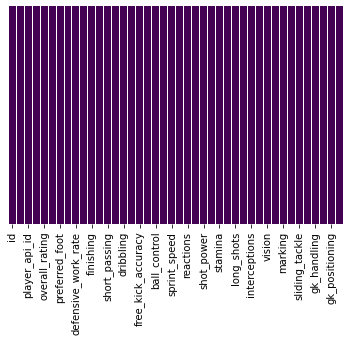

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we have a huge dataset so we can drop the null values rows

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [ ]:
df.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [ ]:
categorical_data = [features for features in df.columns if df[features].dtypes == 'object']
categorical_data

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

Checking if there is much changes in score due to preffered foot

In [ ]:
df_preferred_foot = pd.DataFrame().assign(overall_rating=df['overall_rating'], preferred_foot=df['preferred_foot'])
df_preferred_foot

,overall_rating,preferred_foot
0,67.0,right
1,67.0,right
2,62.0,right
3,61.0,right
4,61.0,right
...,...,...
183973,83.0,right
183974,78.0,right
183975,77.0,right
183976,78.0,right


In [ ]:
df_preferred_foot_right = df_preferred_foot[df_preferred_foot['preferred_foot'] == 'right']

In [ ]:
df_preferred_foot_right['overall_rating'].describe()

count    136247.000000
mean         68.629651
std           7.141298
min          33.000000
25%          64.000000
50%          69.000000
75%          74.000000
max          93.000000
Name: overall_rating, dtype: float64

In [ ]:
df_preferred_foot_left = df_preferred_foot[df_preferred_foot['preferred_foot'] == 'left']

In [ ]:
df_preferred_foot_left['overall_rating'].describe()

count    44107.000000
mean        68.652822
std          6.665704
min         35.000000
25%         64.000000
50%         69.000000
75%         73.000000
max         94.000000
Name: overall_rating, dtype: float64

There is no such difference on preffered foot, so this makes no difference in overall performance rating. Only thing that can be derived from here is that there are more right foot players.

In [ ]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [ ]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

This column contains too many types of categories. These categories seem to affect the performance . In my opinion we can drop all the categorical data. Also the date , we don't ave any specific information on what this date column is about.

In [ ]:
df_1 = df.drop(categorical_data, axis=1)

In [ ]:
correlation = df. corr ()  
correlation. style. background_gradient (cmap = 'BrBG')  

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003744,0.002048,-0.003738,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,-0.014784,-0.019523,-0.008396,-0.008137,-0.013976,-0.008212,-0.011897,-0.000947,-0.005740,-0.009909,-0.010371,-0.004279,-0.010506,-0.008954,-0.010382,-0.018034,-0.008480,-0.015643,-0.007928,-0.011751,-0.010329,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671
player_fifa_api_id,0.003744,1.000000,0.556557,-0.278703,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,0.047551,-0.052501,-0.108735,-0.111272,-0.024942,0.178267,0.178343,0.116309,-0.233465,0.008350,-0.080175,-0.073277,0.015277,-0.178351,-0.068652,-0.170147,-0.169307,-0.078862,-0.163099,-0.175255,-0.075568,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531
player_api_id,0.002048,0.556557,1.000000,-0.328315,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,0.015616,-0.099430,-0.152683,-0.139584,-0.053940,0.101536,0.094236,0.026467,-0.312538,0.021300,-0.126514,-0.141646,-0.109958,-0.234866,-0.119638,-0.212509,-0.185482,-0.105157,-0.188087,-0.162481,-0.089772,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,0.354191,0.357566,0.349800,0.434525,0.443991,0.243998,0.253048,0.239963,0.771856,0.160211,0.428053,0.258978,0.325606,0.315684,0.392668,0.322782,0.249094,0.368978,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,0.339978,0.296050,0.262842,0.343133,0.401803,0.338820,0.340698,0.293714,0.580991,0.202232,0.325459,0.174532,0.259432,0.122392,0.313059,0.162137,0.163292,0.326898,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
crossing,-0.020231,-0.065631,-0.113365,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,0.809747,0.788924,0.708763,0.685649,0.807721,0.599439,0.579506,0.599561,0.384999,0.519778,0.656740,0.021270,0.565935,-0.072915,0.716515,0.324625,0.306446,0.684803,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,-0.008171,-0.029836,-0.062312,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,0.784988,0.691082,0.633274,0.341121,0.720694,0.529355,0.509647,0.554396,0.354769,0.394978,0.727835,0.008948,0.347853,-0.054596,0.806895,0.044465,-0.152560,0.803687,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,-0.011781,-0.103500,-0.130282,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,0.400803,0.320384,0.306013,0.362741,0.550956,0.198164,0.265430,0.068570,0.295601,0.077255,0.541365,0.286305,0.477830,0.493543,0.406003,0.577304,0.454187,0.408972,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,0.788935,0.731948,0.693490,0.803073,0.890622,0.502893,0.490562,0.510650,0.460469,0.462617,0.722320,0.060067,0.611422,0.089782,0.729741,0.455426,0.425764,0.679014,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,-0.006916,-0.088726,-0.131262,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,0.784247,0.752410,0.682909,0.414520,0.749459,0.512931,0.493721,0.560021,0.397448,0.416578,0.746622,0.023143,0.382636,-0.037103,0.814894,0.127425,-0

In [ ]:
nunique = df.nunique()

In [ ]:
nunique

id                     180354
player_fifa_api_id      10410
player_api_id           10410
date                      197
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         8
defensive_work_rate        18
crossing                   95
finishing                  97
heading_accuracy           96
short_passing              95
volleys                    93
dribbling                  97
curve                      92
free_kick_accuracy         97
long_passing               95
ball_control               93
acceleration               86
sprint_speed               85
agility                    81
reactions                  78
balance                    81
shot_power                 96
jumping                    79
stamina                    84
strength                   82
long_shots                 96
aggression                 91
interceptions              96
positioning                94
vision                     97
penalties 

Some of the features have very less relativity with the target variable but not sure if we should drop them
standard scaling

In [ ]:
x = df_1.drop(columns=['overall_rating'])
y = df_1['overall_rating']

In [ ]:
y

0         67.0
1         67.0
2         62.0
3         61.0
4         61.0
          ... 
183973    83.0
183974    78.0
183975    77.0
183976    78.0
183977    80.0
Name: overall_rating, Length: 180354, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

arr = scaler.fit_transform(x)
scaled_df = pd.DataFrame(arr)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-1.732728,0.97557,2.676530,-0.376706,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.867405,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
1,-1.732709,0.97557,2.676530,-0.376706,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.867405,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
2,-1.732690,0.97557,2.676530,-1.136360,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.727846,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
3,-1.732672,0.97557,2.676530,-1.288291,-0.414101,-0.365626,0.772910,-0.175462,-0.355513,-0.522270,...,-0.321282,-0.509973,0.718086,0.588286,0.832253,-0.575765,-0.375462,-0.545138,-0.560960,-0.542630
4,-1.732653,0.97557,2.676530,-1.288291,-0.414101,-0.365626,0.772910,-0.175462,-0.355513,-0.522270,...,-0.321282,-0.509973,0.718086,0.588286,0.832253,-0.575765,-0.375462,-0.545138,-0.560960,-0.542630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180349,1.732412,-1.22040,-0.710404,1.750325,1.673197,1.419929,0.105380,1.870761,1.507269,1.394162,...,1.988589,1.804157,-1.166336,-0.900347,-0.834971,-0.338255,0.255801,3.001995,0.247964,0.213826
180350,1.732431,-1.22040,-0.710404,0.990671,1.093392,1.367412,-0.258727,1.517964,1.507269,1.450527,...,1.988589,0.968499,-0.695231,-0.900347,-0.834971,-0.338255,0.255801,2.481749,0.247964,0.213826
180351,1.732450,-1.22040,-0.710404,0.990671,1.093392,1.104831,-0.258727,1.517964,1.507269,1.450527,...,1.988589,0.968499,-0.695231,-0.900347,-0.834971,-0.338255,0.255801,2.481749,0.247964,0.213826
180352,1.732469,-1.22040,-0.710404,1.142602,1.093392,0.737217,-0.015989,1.659083,1.507269,1.563259,...,1.988589,-0.124285,-0.883673,-0.853827,-0.834971,-0.338255,0.255801,2.481749,0.247964,0.213826


In [ ]:
scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,...,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05,1.803540e+05
mean,5.830773e-18,3.009940e-17,-1.781735e-17,-8.337809e-16,-9.521298e-17,-1.360382e-16,9.874887e-17,3.833339e-17,-1.321182e-16,1.823299e-16,...,3.262081e-17,2.216186e-16,8.966783e-17,1.422236e-16,-1.028265e-17,-4.688257e-17,-1.568005e-17,9.183960e-17,-3.853038e-17,-4.920700e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.732728e+00,-3.158198e+00,-9.813138e-01,-5.238491e+00,-3.139183e+00,-2.571310e+00,-3.414321e+00,-4.197348e+00,-2.656597e+00,-3.284187e+00,...,-3.753089e+00,-3.402636e+00,-2.155657e+00,-2.295941e+00,-2.131702e+00,-8.132744e-01,-9.435987e-01,-9.234985e-01,-9.343101e-01,-8.917633e-01
25%,-8.649362e-01,-1.932199e-01,-7.427516e-01,-6.805675e-01,-5.880422e-01,-8.382723e-01,-5.014650e-01,-3.871402e-01,-7.938151e-01,-4.095390e-01,...,-5.852667e-01,-6.385358e-01,-1.025004e+00,-9.933865e-01,-1.066530e+00,-4.570096e-01,-5.017145e-01,-5.924328e-01,-4.987355e-01,-4.844408e-01
50%,1.434049e-04,3.212695e-01,-4.168780e-01,7.908650e-02,2.236846e-01,1.595374e-01,1.660646e-01,1.773351e-01,1.375759e-01,2.668488e-01,...,1.406925e-01,1.328409e-01,1.527591e-01,2.626477e-01,2.302001e-01,-2.788773e-01,-3.123355e-01,-4.032524e-01,-3.120607e-01,-3.098741e-01
75%,8.652795e-01,6.307281e-01,4.010764e-01,6.868097e-01,7.455090e-01,7.897330e-01,6.515407e-01,6.712510e-01,7.950284e-01,7.177740e-01,...,7.346591e-01,7.756548e-01,9.065278e-01,8.674049e-01,8.785652e-01,-1.007449e-01,-5.983024e-02,-2.613671e-01,-6.316096e-02,-7.711837e-02
max,1.732488e+00,1.274465e+00,4.454460e+00,3.573495e+00,2.310982e+00,2.470255e+00,2.472076e+00,2.435236e+00,2.383872e+00,2.126915e+00,...,2.582555e+00,2.639815e+00,2.225623e+00,2.076919e+00,2.175296e+00,4.708830e+00,4.864023e+00,3.616831e+00,4.977059e+00,4.636184e+00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]

In [ ]:
vif_df['feature'] = x.columns
vif_df

,vif,feature
0,1.002236,id
1,1.691836,player_fifa_api_id
2,1.856405,player_api_id
3,2.411777,potential
4,4.934395,crossing
5,7.151231,finishing
6,4.279056,heading_accuracy
7,8.897516,short_passing
8,5.301044,volleys
9,10.104612,dribbling


In [ ]:
vif_df[vif_df['vif'] >=10 ]

,vif,feature
9,10.104612,dribbling
13,13.646195,ball_control
29,13.230610,marking
30,18.195222,standing_tackle
31,13.242745,sliding_tackle
32,14.193544,gk_diving
33,21.554012,gk_handling
35,21.926633,gk_positioning
36,24.184387,gk_reflexes


In [ ]:
vif_df[vif_df['vif'] >=10 ]
index = vif_df[vif_df['vif'] >=10 ].index
index

Int64Index([9, 13, 29, 30, 31, 32, 33, 35, 36], dtype='int64')

In [ ]:
scaled_df_copy = scaled_df.copy()
scaled_df.drop(index ,axis=1, inplace=True)


In [ ]:
scaled_df_copy

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-1.732728,0.97557,2.676530,-0.376706,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.867405,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
1,-1.732709,0.97557,2.676530,-0.376706,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.867405,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
2,-1.732690,0.97557,2.676530,-1.136360,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.727846,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
3,-1.732672,0.97557,2.676530,-1.288291,-0.414101,-0.365626,0.772910,-0.175462,-0.355513,-0.522270,...,-0.321282,-0.509973,0.718086,0.588286,0.832253,-0.575765,-0.375462,-0.545138,-0.560960,-0.542630
4,-1.732653,0.97557,2.676530,-1.288291,-0.414101,-0.365626,0.772910,-0.175462,-0.355513,-0.522270,...,-0.321282,-0.509973,0.718086,0.588286,0.832253,-0.575765,-0.375462,-0.545138,-0.560960,-0.542630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180349,1.732412,-1.22040,-0.710404,1.750325,1.673197,1.419929,0.105380,1.870761,1.507269,1.394162,...,1.988589,1.804157,-1.166336,-0.900347,-0.834971,-0.338255,0.255801,3.001995,0.247964,0.213826
180350,1.732431,-1.22040,-0.710404,0.990671,1.093392,1.367412,-0.258727,1.517964,1.507269,1.450527,...,1.988589,0.968499,-0.695231,-0.900347,-0.834971,-0.338255,0.255801,2.481749,0.247964,0.213826
180351,1.732450,-1.22040,-0.710404,0.990671,1.093392,1.104831,-0.258727,1.517964,1.507269,1.450527,...,1.988589,0.968499,-0.695231,-0.900347,-0.834971,-0.338255,0.255801,2.481749,0.247964,0.213826
180352,1.732469,-1.22040,-0.710404,1.142602,1.093392,0.737217,-0.015989,1.659083,1.507269,1.563259,...,1.988589,-0.124285,-0.883673,-0.853827,-0.834971,-0.338255,0.255801,2.481749,0.247964,0.213826


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train , y_test = train_test_split(scaled_df_copy, y , test_size=0.25)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.score(x_test, y_test)

0.8609521955811676

In [ ]:
def adj_r2(x, y):
  r2 = lr.score(x,y)
  n = x.shape[0]
  p = x.shape[1]
  adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

adj_r2(x_test,y_test)

0.8608379968116954

In [ ]:
x_train_copy,x_test_copy, y_train_copy , y_test_copy = train_test_split(scaled_df, y , test_size=0.25)

In [ ]:
lr.fit(x_train_copy, y_train_copy)

LinearRegression()

In [ ]:
lr.score(x_test_copy, y_test_copy)

0.8166562284219352

This means while droping the features having vif > 10 we are dropping some important features

In [ ]:
#checking which features are highly correlative with target , from the one having vif > 10
df_having_vifmorethantem = pd.DataFrame

In [ ]:
df_having_vifmorethantem = vif_df[vif_df['vif'] >=10 ]

In [ ]:
df_having_vifmorethantem

,vif,feature
9,10.104612,dribbling
13,13.646195,ball_control
29,13.230610,marking
30,18.195222,standing_tackle
31,13.242745,sliding_tackle
32,14.193544,gk_diving
33,21.554012,gk_handling
35,21.926633,gk_positioning
36,24.184387,gk_reflexes


In [ ]:
df['dribbling'].corr(df['overall_rating'])

0.35419060093846755

In [ ]:
df['ball_control'].corr(df['overall_rating'])

0.4439907628262989

In [ ]:
df['marking'].corr(df['overall_rating'])

0.13218473835173328

In [ ]:
df['standing_tackle'].corr(df['overall_rating'])

0.16398609375977713

In [ ]:
df['sliding_tackle'].corr(df['overall_rating'])

0.12805401295121138

In [ ]:
df['gk_diving'].corr(df['overall_rating'])

0.027674967162302375

In [ ]:
df['gk_handling'].corr(df['overall_rating'])

0.006717294838212119

In [ ]:
df['gk_reflexes'].corr(df['overall_rating'])

0.007803569907558567

In [ ]:
df['gk_positioning'].corr(df['overall_rating'])

0.008029270276245398

In [121]:
new_df_copy = scaled_df_copy.copy()

In [122]:
new_df_copy.drop([33,35,36] ,axis=1, inplace=True)

In [123]:
x_train_new,x_test_new, y_train_new , y_test_new = train_test_split(new_df_copy, y , test_size=0.25)

In [124]:
lr.fit(x_train_new, y_train_new)

LinearRegression()

In [125]:
lr.score(x_test_new, y_test_new)

0.8560718701733243

In [106]:
#vif >= 14 only should be dropped
